## Pandas

Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

You can find more at [http://pandas.pydata.org/pandas-docs/stable/tutorials.html#lessons-for-new-pandas-users](http://pandas.pydata.org/pandas-docs/stable/tutorials.html#lessons-for-new-pandas-users)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# create a series 삼육구!
s = pd.Series([1,2, np.nan,4,5,np.nan,7,8, np.nan])
s


0    1.0
1    2.0
2    NaN
3    4.0
4    5.0
5    NaN
6    7.0
7    8.0
8    NaN
dtype: float64

In [3]:
# create a data frame
dates = pd.date_range('20180207',periods=3)
dates

DatetimeIndex(['2018-02-07', '2018-02-08', '2018-02-09'], dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(3,4),index=dates,columns=list('ABCD'))
df

,A,B,C,D
2018-02-07,0.361890,-1.070510,0.192867,-1.539664
2018-02-08,-0.693537,-0.440773,2.220608,-0.975612
2018-02-09,0.925112,-0.249357,0.421006,0.181176


In [5]:
# A different way to create a dataframe
# another way to create a data frame
dfb = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20180207'),
      'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
      'D' : np.array([3] * 4,dtype='int32'),
      'E' : 'haaaay' })
dfb

,A,B,C,D,E
0,1.0,2018-02-07,1.0,3,haaaay
1,1.0,2018-02-07,1.0,3,haaaay
2,1.0,2018-02-07,1.0,3,haaaay
3,1.0,2018-02-07,1.0,3,haaaay


In [6]:
dfb.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E            object
dtype: object

In [7]:
# quick data summary
df.describe()

,A,B,C,D
count,3.000000,3.000000,3.000000,3.000000
mean,0.197821,-0.586880,0.944827,-0.778033
std,0.821703,0.429632,1.110731,0.877269
min,-0.693537,-1.070510,0.192867,-1.539664
25%,-0.165824,-0.755642,0.306937,-1.257638
50%,0.361890,-0.440773,0.421006,-0.975612
75%,0.643501,-0.345065,1.320807,-0.397218
max,0.925112,-0.249357,2.220608,0.181176


In [8]:
# axis 0 is rows, axis 1 is columns
df.sort_index(axis=0, ascending=False)

,A,B,C,D
2018-02-09,0.925112,-0.249357,0.421006,0.181176
2018-02-08,-0.693537,-0.440773,2.220608,-0.975612
2018-02-07,0.361890,-1.070510,0.192867,-1.539664


### Data Selection

In [9]:
# select a column (yields a series)
df['A']

2018-02-07    0.361890
2018-02-08   -0.693537
2018-02-09    0.925112
Freq: D, Name: A, dtype: float64

In [10]:
# Another way to access the column
df.A

2018-02-07    0.361890
2018-02-08   -0.693537
2018-02-09    0.925112
Freq: D, Name: A, dtype: float64

In [11]:
# just getting the first two rows
df[0:2]


,A,B,C,D
2018-02-07,0.361890,-1.070510,0.192867,-1.539664
2018-02-08,-0.693537,-0.440773,2.220608,-0.975612


In [12]:
df['20180207':'20180208'] # another way


,A,B,C,D
2018-02-07,0.361890,-1.070510,0.192867,-1.539664
2018-02-08,-0.693537,-0.440773,2.220608,-0.975612


In [13]:
# cross-section using a label
df.loc[dates[0]]

A    0.361890
B   -1.070510
C    0.192867
D   -1.539664
Name: 2018-02-07 00:00:00, dtype: float64

In [14]:
# boolean indexing
df[df.A > 0]

,A,B,C,D
2018-02-07,0.361890,-1.070510,0.192867,-1.539664
2018-02-09,0.925112,-0.249357,0.421006,0.181176


In [15]:
# filtering
df3 = df.copy()
df3['D'] = ['one', 'two','three']
df3[df3['D'].isin(['two', 'three'])]

,A,B,C,D
2018-02-08,-0.693537,-0.440773,2.220608,two
2018-02-09,0.925112,-0.249357,0.421006,three


In [16]:
# setting examples 
df.at[dates[0],'A'] = 0
df.iat[0,1] = 0
df.loc[:, 'D'] = np.array([5] * len(df))
df

,A,B,C,D
2018-02-07,0.000000,0.000000,0.192867,5
2018-02-08,-0.693537,-0.440773,2.220608,5
2018-02-09,0.925112,-0.249357,0.421006,5


In [17]:
# dealing with missing data
df4 = df.reindex(index=dates[0:4],columns=list(df.columns) + ['E'])
df4.loc[dates[0]:dates[1],'E'] = 1
df4

,A,B,C,D,E
2018-02-07,0.000000,0.000000,0.192867,5,1.0
2018-02-08,-0.693537,-0.440773,2.220608,5,1.0
2018-02-09,0.925112,-0.249357,0.421006,5,NaN


In [18]:
# drop rows with missing data
df4.dropna(how='any')

,A,B,C,D,E
2018-02-07,0.000000,0.000000,0.192867,5,1.0
2018-02-08,-0.693537,-0.440773,2.220608,5,1.0


In [19]:
# fill missing data
df4.fillna(value=5)

,A,B,C,D,E
2018-02-07,0.000000,0.000000,0.192867,5,1.0
2018-02-08,-0.693537,-0.440773,2.220608,5,1.0
2018-02-09,0.925112,-0.249357,0.421006,5,5.0


In [20]:
# boolean mask for nan values
pd.isnull(df4)

,A,B,C,D,E
2018-02-07,False,False,False,False,False
2018-02-08,False,False,False,False,False
2018-02-09,False,False,False,False,True


In [21]:
df.mean()

A    0.077192
B   -0.230043
C    0.944827
D    5.000000
dtype: float64

In [22]:
# pivot the mean calculation (acorss rows)
df.mean(1)

2018-02-07    1.298217
2018-02-08    1.521574
2018-02-09    1.524190
Freq: D, dtype: float64

### Merging / Grouping / Shaping


In [23]:
# concatenation
df = pd.DataFrame(np.random.randn(10, 4))
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,-3.055975,-1.115422,0.704831,-0.146919
1,1.399784,-0.153592,0.431300,0.409175
2,0.237687,0.324486,0.670334,0.004899
3,0.734225,-1.408534,-1.104097,-0.176335
4,-2.066049,-1.497012,0.661056,1.425358
5,-0.473248,0.387482,0.016063,0.556949
6,0.840528,-0.015822,-0.080902,-0.245547
7,0.208119,-0.150963,0.499687,0.837903
8,0.091839,0.946750,0.397122,1.097954
9,0.676076,0.340799,-0.520367,-0.555176


In [24]:
# SQL-style join
left = pd.DataFrame({'key': ['haay', 'haay'], 'lval': [2, 4]})
right = pd.DataFrame({'key': ['haay', 'haay'], 'rval': [6, 9]})
pd.merge(left, right, on='key')

,key,lval,rval
0,haay,2,6
1,haay,2,9
2,haay,4,6
3,haay,4,9


In [25]:
# append
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,0.534316,-0.250368,0.279735,-0.637254
1,0.723515,-0.275046,1.012165,-0.851061
2,1.056079,-0.117339,-1.365692,0.676634
3,-0.612685,0.397511,0.801801,-2.100801
4,0.577497,-0.294004,-0.057546,0.526534
5,-0.273089,-0.286211,-0.278239,0.847493
6,-1.644264,0.888194,-0.397662,0.776289
7,0.068964,-0.227649,-0.707797,0.264533
8,-0.612685,0.397511,0.801801,-2.100801


In [26]:
df = pd.DataFrame(
    { 'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
      'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
      'C' : np.random.randn(8),
      'D' : np.random.randn(8) })
df

,A,B,C,D
0,foo,one,-0.572088,0.849767
1,bar,one,-1.554202,-1.044504
2,foo,two,-0.070662,-0.207202
3,bar,three,-0.257040,-1.668275
4,foo,two,-0.227637,1.065360
5,bar,two,-0.637002,0.001124
6,foo,one,-0.094128,0.328312
7,foo,three,0.262664,-0.230402


In [27]:
# group by
df.groupby('A').sum()

,C,D
A,,
bar,-2.448244,-2.711654
foo,-0.701850,1.805835


### Time Series

In [28]:
# time period resampling
rng = pd.date_range('1/1/2018', periods=50, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

2018-01-01    14247
Freq: 5T, dtype: int32

In [29]:
rng = pd.date_range('1/1/2018', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2018-01-31   -1.227726
2018-02-28   -0.017345
2018-03-31   -0.125912
2018-04-30   -0.361543
2018-05-31    1.312893
Freq: M, dtype: float64

In [30]:
ps = ts.to_period()
ps.to_timestamp()

2018-01-01   -1.227726
2018-02-01   -0.017345
2018-03-01   -0.125912
2018-04-01   -0.361543
2018-05-01    1.312893
Freq: MS, dtype: float64

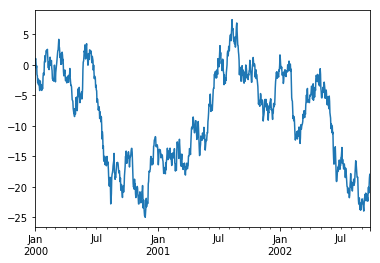

In [31]:
# time series plot
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

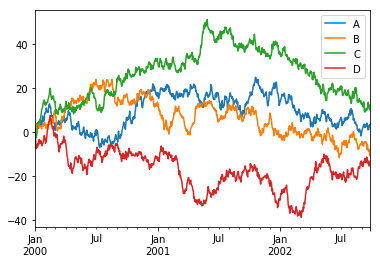

In [32]:
# plot with a data frame
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

### I/O

In [33]:
# write to a csv file
df.to_csv('hay.csv', index=False)


In [34]:
# can also do Excel
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [35]:
newDf2 = pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])
newDf2.head()

,A,B,C,D
2000-01-01,-0.249515,-1.658182,-0.202620,-1.832149
2000-01-02,0.702303,-0.870766,-1.642079,-3.341194
2000-01-03,0.791149,-0.557191,-1.785186,-5.339878
2000-01-04,2.621036,1.466578,-2.549105,-7.516285
2000-01-05,3.429863,1.416912,-1.895580,-6.370975
